In [1]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment

from agent import Agent
%matplotlib inline

In [2]:
seed    = 42    # Initialize the seed
gpu     = True  # Enable True/False for the GPU 
device  = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") if gpu else "cpu"
print("Device: {}".format(device))

Device: cuda:0


In [3]:
env = UnityEnvironment(file_name='Reacher_Linux_Multi_Agent/Reacher.x86_64', seed=seed)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# Get the default brain
# Brains are responsible for deciding the actions of their associated agents
brain_name  = env.brain_names[0]
print("Controlling Brain: {}".format(brain_name))

Controlling Brain: ReacherBrain


In [5]:
# Reset the environment
env_info    = env.reset(train_mode=True)[brain_name]
# Number of agents
num_agents  = len(env_info.agents)
print('Number of agents: {}'.format(num_agents))
# Dimension of each action
action_dim  = env.brains[brain_name].vector_action_space_size
print('Action dimension: {}'.format(action_dim))
# State dimension
state_dim   = env_info.vector_observations.shape[1]
print('Observation dimension: {}'.format(state_dim))

Number of agents: 20
Action dimension: 4
Observation dimension: 33


In [6]:
# Create n agent object, which shares same replay buffer
n_agents = Agent(state_dim, action_dim, gpu=gpu, seed=seed)

In [7]:
def ddpg(env: UnityEnvironment, brain_name: str, n_agents: Agent, num_agents: int, num_episodes=250, max_t = 1000, print_every=100):
    scores = []
    scores_window= deque(maxlen = print_every)

    for i_episode in range(1, num_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        score = np.zeros(num_agents)
        n_agents.reset()

        for _ in range(max_t):
            actions = n_agents.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            n_agents.step(states, actions, rewards, next_states, dones)
            score += rewards
            states = next_states

            if any(dones):
                break
        
        scores.append(np.mean(score))
        scores_window.append(np.mean(score))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode % 100 == 0:
            n_agents.save_model()
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))   
    return scores

In [8]:
# Call to DDPG, run with n_agent on env
scores = ddpg(env, brain_name, n_agents, num_agents)

Episode 1	Average Score: 0.58
Episode 2	Average Score: 0.46
Episode 3	Average Score: 0.38
Episode 4	Average Score: 0.36
Episode 5	Average Score: 0.47
Episode 6	Average Score: 0.56
Episode 7	Average Score: 0.59
Episode 8	Average Score: 0.65
Episode 9	Average Score: 0.68
Episode 10	Average Score: 0.73
Episode 11	Average Score: 0.76
Episode 12	Average Score: 0.78
Episode 13	Average Score: 0.78
Episode 14	Average Score: 0.81
Episode 15	Average Score: 0.82
Episode 16	Average Score: 0.84
Episode 17	Average Score: 0.88
Episode 18	Average Score: 0.97
Episode 19	Average Score: 1.08
Episode 20	Average Score: 1.17
Episode 21	Average Score: 1.25
Episode 22	Average Score: 1.33
Episode 23	Average Score: 1.40
Episode 24	Average Score: 1.49
Episode 25	Average Score: 1.60
Episode 26	Average Score: 1.68
Episode 27	Average Score: 1.82
Episode 28	Average Score: 1.99
Episode 29	Average Score: 2.18
Episode 30	Average Score: 2.38
Episode 31	Average Score: 2.78
Episode 32	Average Score: 3.11
Episode 33	Averag

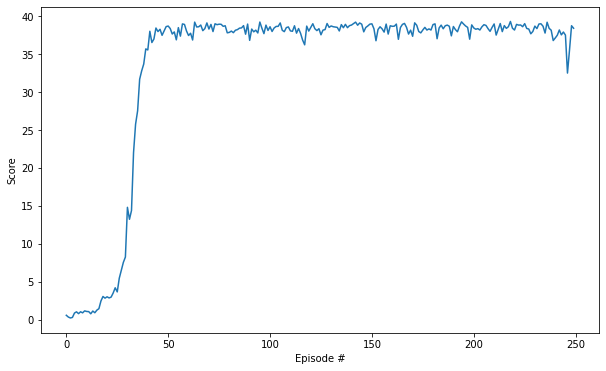

In [9]:
# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [ ]:
# n_agents.load_model('checkpoint_actor.pth', 'checkpoint_critic.pth')

In [ ]:
# # Watch the trained agent(s) moving its/their arm(s)
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = n_agents.act(states)
#     env_info = env.step(actions)[brain_name]
#     next_states = env_info.vector_observations
#     rewards = env_info.rewards
#     dones = env_info.local_done
#     n_agents.step(states, actions, rewards, next_states, dones)
#     scores += rewards
#     states = next_states

#     if any(dones):
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [ ]:
env.close()